# Crab Age Prediction: Exploratory Data Analysis and Modeling

##### **Author:** Alejandro Santos  
##### **Date:** January 2026  
##### **Context:** Machine Learning Regression Project - [Personal Project]

#### Project Overview

##### - This project aims to predict the age of crabs based on physical measurements such as weight, length, and diameter. 
##### - The analysis focuses on robust data cleaning, outlier management, and feature engineering to optimize predictive performance.

### Table of Contents
1. [Data Loading & Initial Inspection](#1.-Data-Loading)
2. [Exploratory Data Analysis (EDA)](#2.-EDA)
3. [Outlier Management (IQR Method)](#3.-Outliers)
4. [Data Cleaning Results](#4.-Cleaning)
5. [Feature Engineering & Modeling (Next Steps)](#5.-Modeling)

#### 1.- Data Loading & Initial Inspection

In [190]:
# bookstore import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [191]:
# dataset import
df = pd.read_csv("CrabAgePrediction.csv")
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [192]:
df.shape

(3893, 9)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [194]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Following the initial inspection of the dataset, the integrity of the information is confirmed as no null or missing values were detected. The dataset consists of 11 variables, structured into 7 continuous (decimal) features, one discrete target variable (Age), and one categorical variable (Sex) coded into three categories.

#### 2.- Exploratory Data Analysis (EDA)

##### 2.1.- Missing Values Analysis

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


##### 2.2.- Detection of disguised missing values.

In [200]:
physical_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

df_check = df.copy()
df_check[physical_columns] = df_check[physical_columns].replace(0, np.nan)

##### 2.3.- Using heatmap

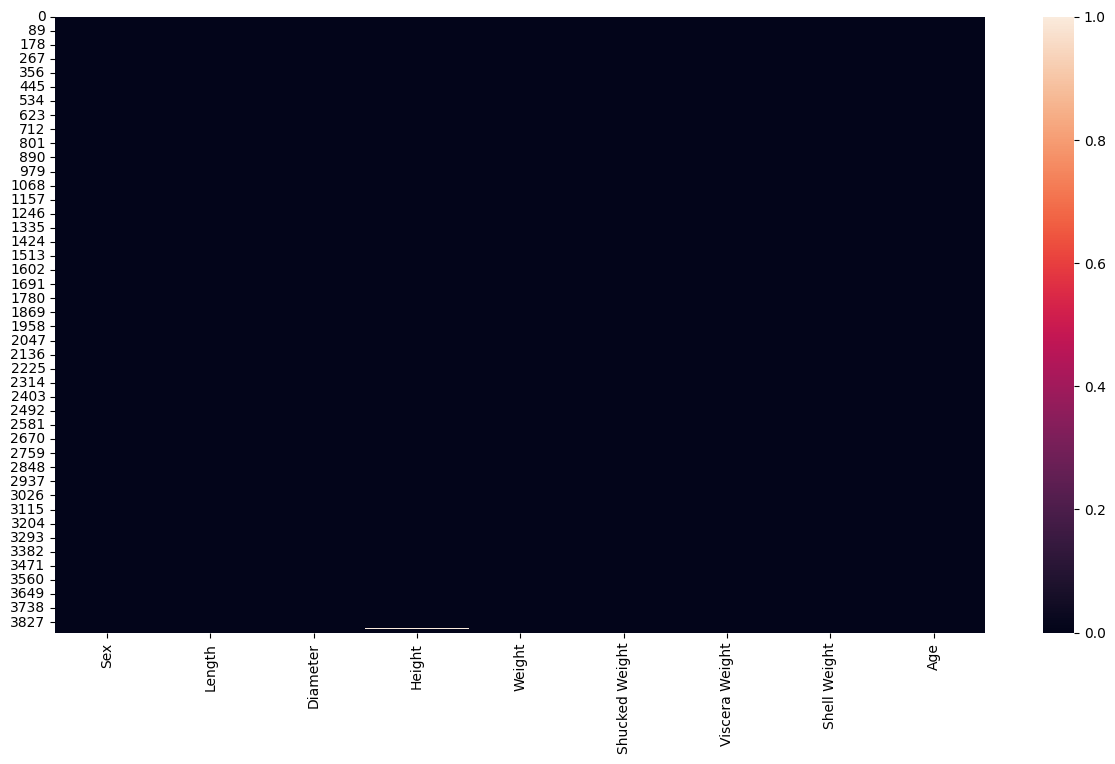

In [202]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df_check.isnull())
plt.show()

In [203]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


We only have two records with disguised null values, and with a dataset of nearly 4000 records, it wouldn't be worthwhile to create those values synthetically, so we'll remove them.

In [205]:
df = df[df['Height']>0]

df[df['Height']==0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


#### 3.- Outlier Management (IQR Method)

##### 3.1.- Use of IQR (Interquartile Range) - Numerical Variables

In [208]:
columns = df.columns[1:]

for col in columns:
    # We calculate Q1 (25th percentile) and Q3 (75th percentile)
    q75, q25 = np.percentile(df[col], [75, 25])
    iqr = q75 - q25
    
    print(f"Column: {col} | IQR: {iqr}")

Column: Length | IQR: 0.4125000000000001
Column: Diameter | IQR: 0.32499999999999996
Column: Height | IQR: 0.125
Column: Weight | IQR: 20.113970249999998
Column: Shucked Weight | IQR: 8.930092499999999
Column: Viscera Weight | IQR: 4.528832625
Column: Shell Weight | IQR: 5.634463125
Column: Age | IQR: 3.0


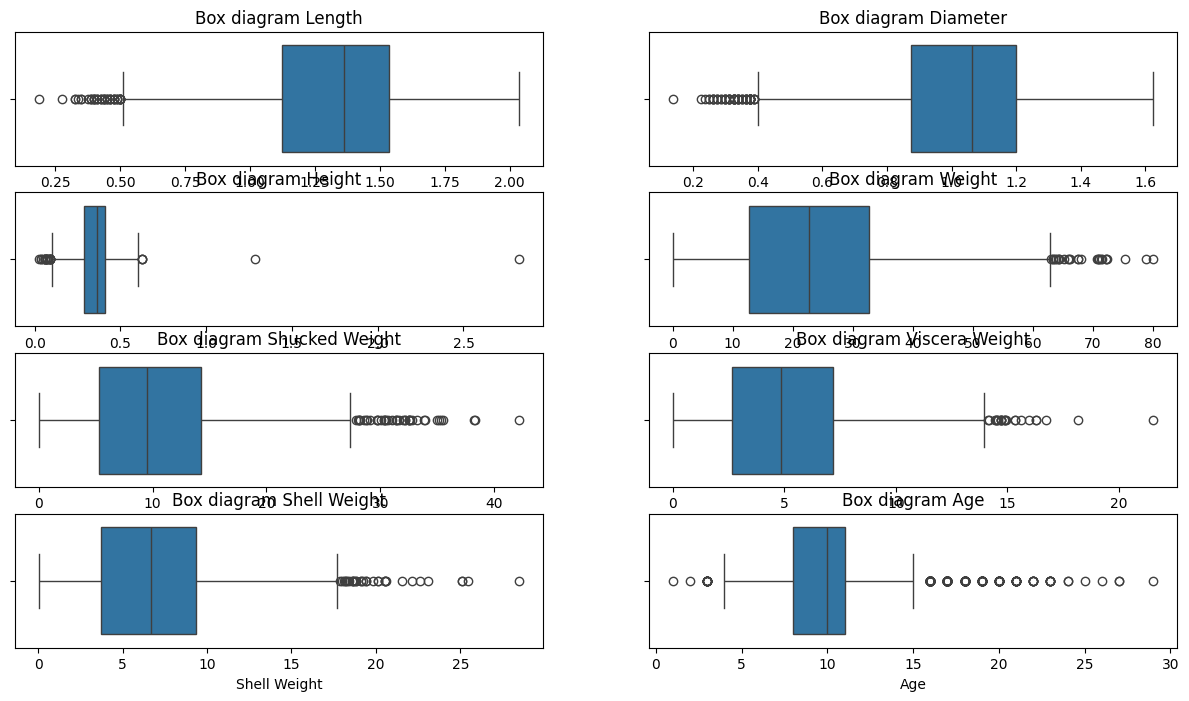

In [209]:
fig, axes = plt.subplots(4, 2, figsize=(15,8))
columns = df.columns[1:]
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].set_title(f"Box diagram {col}")
    sns.boxplot(x=df[col], ax=axes[i])

All features show a right-skewed distribution, where extreme values (outliers) may negatively affect predictive accuracy. To mitigate this risk, we will evaluate the density of values beyond the upper and lower limits to implement an evidence-based data cleaning strategy.

In [211]:
for col in columns:
    q75, q25 = np.percentile(df[col], [75, 25])
    iqr = q75 - q25
    
    # Definimos límites
    limite_superior = q75 + 1.5 * iqr
    limite_inferior = q25 - 1.5 * iqr
    
    # Filtramos y contamos
    outliers_sup = df[df[col] > limite_superior].shape[0]
    outliers_inf = df[df[col] < limite_inferior].shape[0]
    total_outliers = outliers_sup + outliers_inf
    porcentaje = (total_outliers / len(df)) * 100
    
    print(f"{col}: {total_outliers} outliers ({porcentaje:.2f}%) | Limite superior: {limite_superior}, Limite inferior {limite_inferior}")

Length: 45 outliers (1.16%) | Limite superior: 2.15625, Limite inferior 0.5062499999999999
Diameter: 58 outliers (1.49%) | Limite superior: 1.6875, Limite inferior 0.38750000000000007
Height: 25 outliers (0.64%) | Limite superior: 0.6, Limite inferior 0.09999999999999998
Weight: 27 outliers (0.69%) | Limite superior: 62.971326874999995, Limite inferior -17.484554125
Shucked Weight: 41 outliers (1.05%) | Limite superior: 27.669112, Limite inferior -8.051257999999997
Viscera Weight: 24 outliers (0.62%) | Limite superior: 14.001109312499999, Limite inferior -4.1142211875
Shell Weight: 33 outliers (0.85%) | Limite superior: 17.8070296875, Limite inferior -4.7308228125
Age: 257 outliers (6.60%) | Limite superior: 15.5, Limite inferior 3.5


The following were detected:
- Extreme outliers that will be removed due to their low quantity (outliers less than 2%)
- Extreme outliers that will be preprocessed using a scaler (outliers greater than 5%)

The data are filtered using closed intervals [Li, Ls] to ensure that values located exactly on the limits calculated by Tukey's method (1.5 * IQR) are retained as valid observations.

In [214]:
df_clean = df.copy()
columnas = df_clean.columns[1:-1]

for col in columnas:
    # Calculamos los cuartiles sobre el dataframe que ya está siendo limpiado
    q75, q25 = np.percentile(df_clean[col], (75, 25))
    iqr = q75 - q25

    limite_superior = q75 + 1.5 * iqr
    limite_inferior = q25 - 1.5 * iqr

    #filtrado de dataframe y sobreescribirlo
    df_clean = df_clean[(df_clean[col] >= limite_inferior) & (df_clean[col] <= limite_superior)]

print("Dataset limpio: ", df_clean.shape)

Dataset limpio:  (3744, 9)


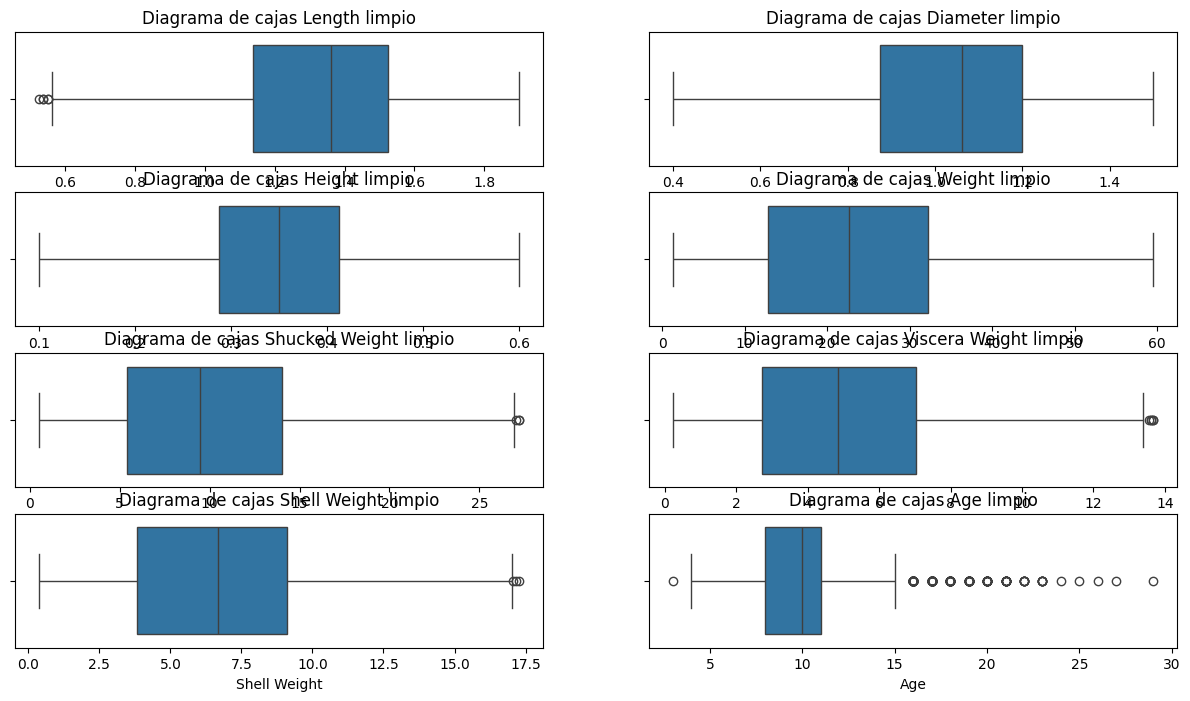

In [215]:
fig, axes = plt.subplots(4, 2, figsize=(15,8))
axes = axes.flatten()
columnas = df_clean.columns[1:]

for i, col in enumerate(columnas):
    axes[i].set_title(f"Diagrama de cajas {col} limpio")
    sns.boxplot(x=df_clean[col], ax=axes[i])

After performing a thorough analysis using Tukey's method, outliers were removed from the independent variables (features), resulting in a more robust distribution for training.

However, a strategic decision was made not to filter out outliers from the target variable ('Age'). This decision is based on the fact that extreme values represent 6.60% of the dataset, a significant proportion whose removal would result in a critical variance loss and bias the model, preventing it from generalizing correctly across older age ranges.

To mitigate the impact of these values without sacrificing information, a feature engineering and preprocessing phase will be implemented using robust scalers (such as RobustScaler) or nonlinear transformations. This will allow the model to learn from the biological complexity of the data without being negatively affected by the magnitude of the extreme values.

#### 4.- Data Cleaning Results

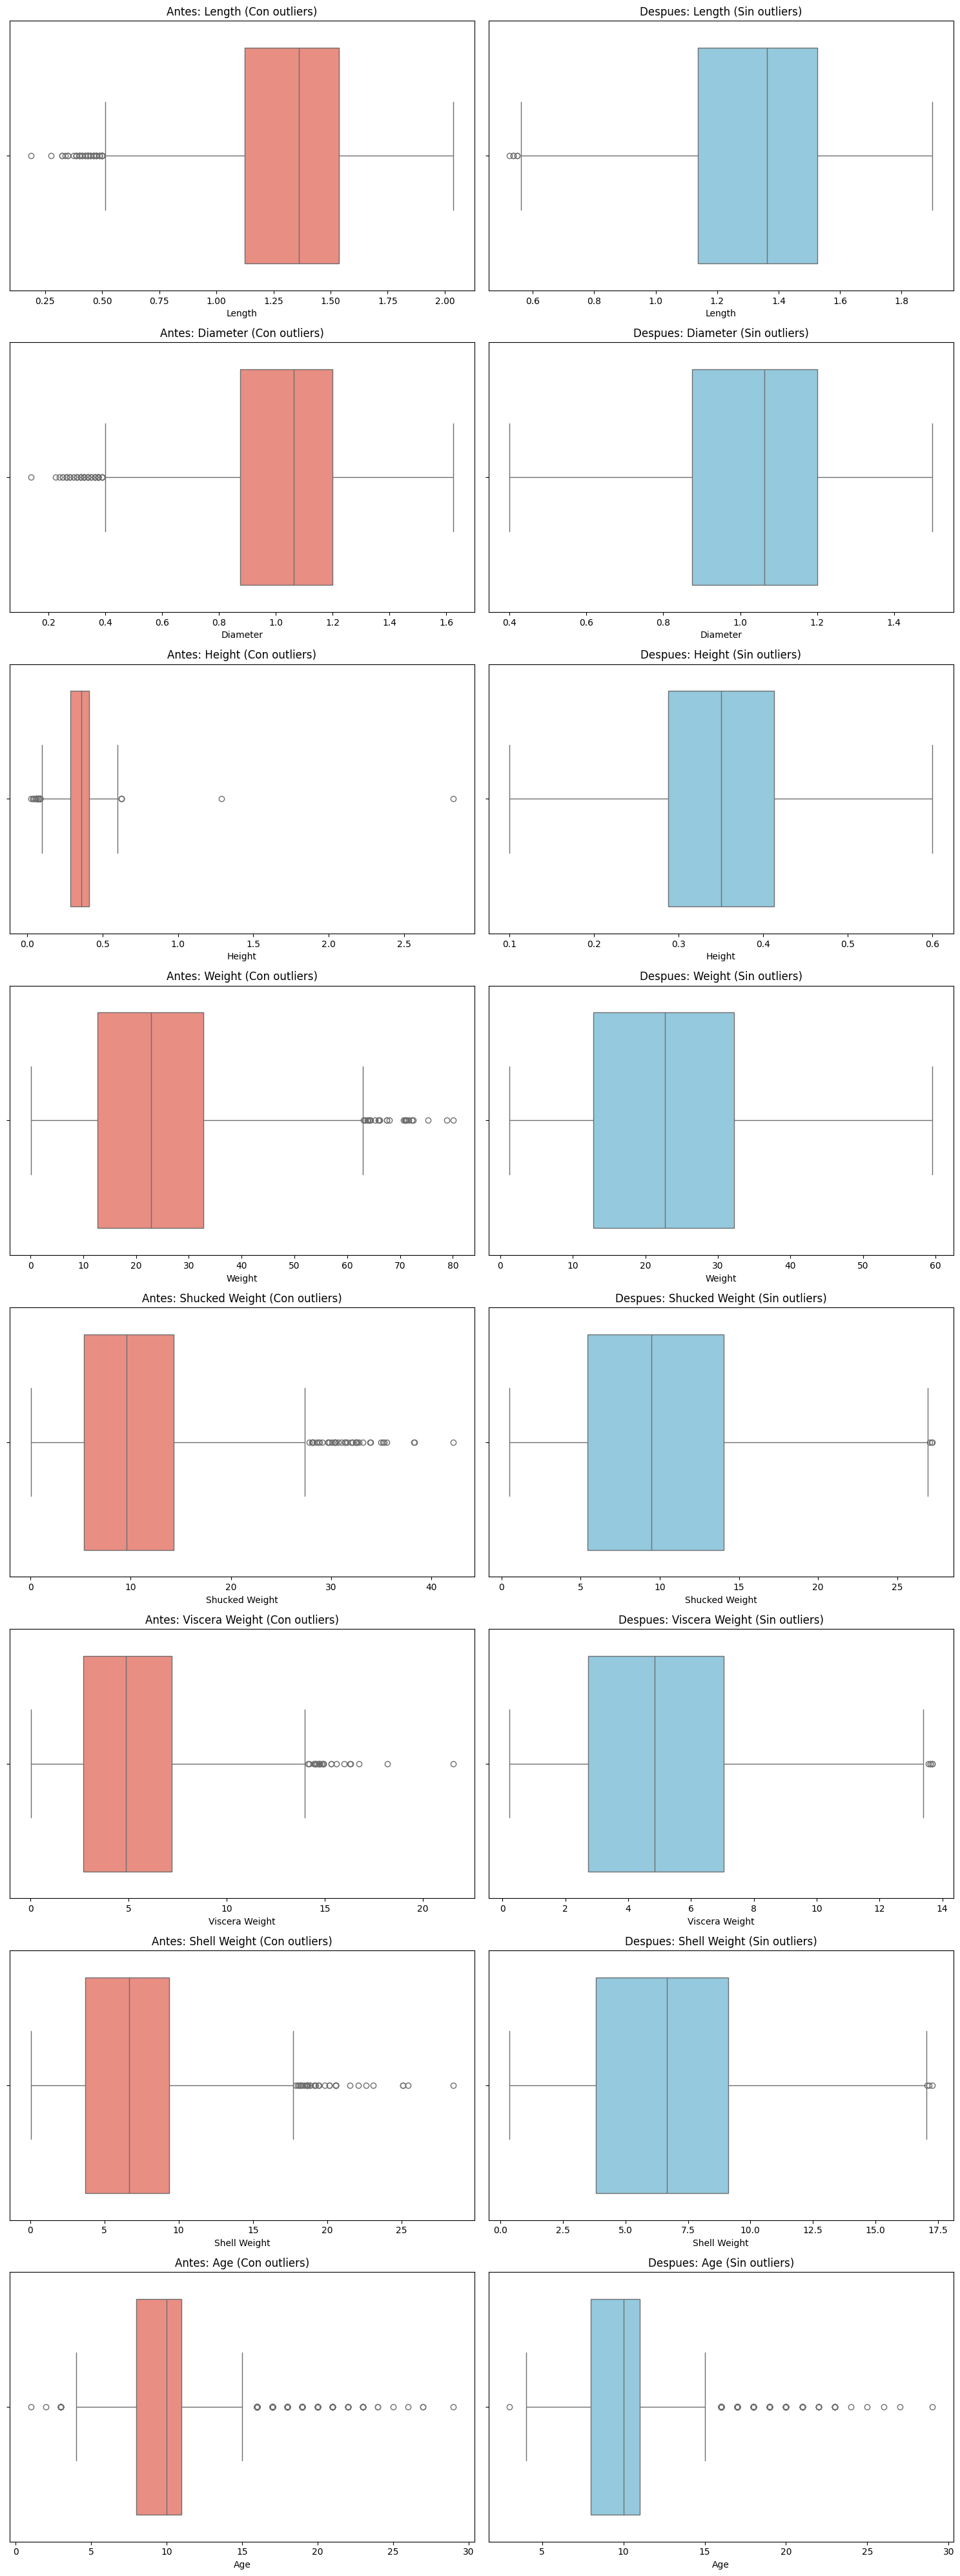

In [218]:
def graficos_limpieza(df, df_clean, lista_cols):
    n=len(lista_cols)
    # cuadricula
    fig, axes = plt.subplots(n, 2, figsize=(15, 5 * n))

    for i, col in enumerate(lista_cols):
        #Columna con outliers
        sns.boxplot(x=df[col], ax=axes[i, 0], color='salmon')
        axes[i, 0].set_title(f"Antes: {col} (Con outliers)")

        sns.boxplot(x=df_clean[col], ax=axes[i, 1], color='skyblue')
        axes[i, 1].set_title(f"Despues: {col} (Sin outliers)")

    plt.tight_layout()
    plt.show()

columnas_a_graficar = df.columns[1:]
graficos_limpieza(df, df_clean, columnas_a_graficar)